In [5]:
import pandas as pd               
import numpy as np                   
import matplotlib.pyplot as plt                     
import seaborn as sns   
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv(r"C:\Users\om420\Downloads\train.csv.zip")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


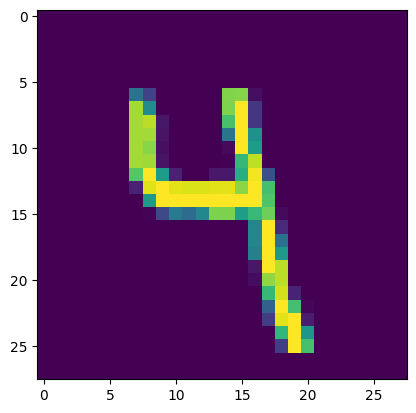

In [7]:
plt.imshow(df.iloc[29153,1:].values.reshape(28,28))

In [8]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
#checking how much time taken to run
import time            
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

13.712924718856812


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=784)
    

In [ ]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [ ]:
X_test_trf.shape

(8400, 66)

In [ ]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_trf=knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test,y_pred_trf)

0.9545238095238096

In [ ]:
for i in range(1,785):
    from sklearn.decomposition import PCA
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred_trf=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred_trf)*100)

25.80952380952381
32.36904761904762
51.04761904761905
66.63095238095238
73.78571428571429
82.27380952380953
84.36904761904762
87.21428571428571
88.6547619047619
90.55952380952381
91.16666666666666
91.84523809523809
92.76190476190476
93.51190476190476
93.84523809523809
93.79761904761905
94.07142857142857
94.0


KeyboardInterrupt: 

In [23]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [ ]:
X_train_trf

array([[-226.60523462, -305.89437099, -417.17563833],
       [  38.33583717,  461.09152047, -100.40840682],
       [-305.49225463,  351.67141678,  961.3475787 ],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926],
       [ 233.97011308,  -18.64779077,  148.27481803],
       [1096.50373629,  254.72333173,  560.33354832]])

In [ ]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

FINDING OPTIMUM NUMBER OF PRINCIPLE COMPONENTS


In [24]:
#eigen values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [28]:
pca.components_.shape

(784, 784)

In [29]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [27]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [30]:
np.cumsum(pca.explained_variance_ratio_)*100

array([  5.78519225,   9.93446193,  13.73870094,  16.70496371,
        19.2865254 ,  21.54150558,  23.5145736 ,  25.28985357,
        26.85850424,  28.29456752,  29.66482235,  30.89207736,
        32.03898935,  33.16201674,  34.22054559,  35.24047664,
        36.1981528 ,  37.14086161,  38.05335104,  38.94352123,
        39.78346173,  40.60352492,  41.38882815,  42.14556786,
        42.88282888,  43.58471353,  44.28263326,  44.95373775,
        45.59358278,  46.22392007,  46.83927092,  47.44165957,
        48.02533355,  48.6038813 ,  49.17621445,  49.72261423,
        50.2658216 ,  50.79399435,  51.30737609,  51.80139157,
        52.28906267,  52.77104144,  53.23924587,  53.69858836,
        54.15624919,  54.60546821,  55.05015043,  55.49169118,
        55.92680312,  56.35883605,  56.78064492,  57.19888804,
        57.60688239,  58.00888731,  58.40722316,  58.80182197,
        59.18869358,  59.57188877,  59.94844139,  60.32263485,
        60.68748701,  61.04828955,  61.402176  ,  61.75

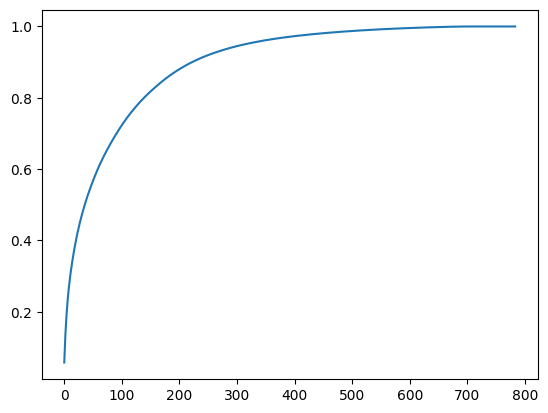

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))